# [オンライン開催]セキュリティから学ぶ機械学習第2回


## Section0. 前段
情報セキュリティの分野で最も脅威なものの１つに、悪意のあるプログラム（マルウェア）が挙げられます。  
マルウェアによる情報漏洩やサイバー攻撃に関するニュースを日常の中で聞くことが多々あるかもしれないですが、攻撃者は日々開発スキルを強化していて、企業のセキュリティ対策への対抗手段やウイルス対策製品を回避できる新しいマルウェアを開発しています。  
  
今回の勉強会では、これらマルウェアの基本的な知識を紹介しつつ、マルウェアを検知・検出するための機械学習アルゴリズムの基礎を学びます。

### Section0-1. マルウェアとは
利用者の同意や合意なしに情報システムに侵入して、利用者やシステムに被害を与えるように設計された悪意のあるプログラム、ソフトウェア全般を指します。マルウェアという言葉には次のようなサブカテゴリがあります。  



*   **コンピュータウイルス**:  
コンピュータウイルスは、電子メールやホームページ閲覧などによってコンピュータに侵入する特殊なプログラム  
(総務省: 国民のための情報セキュリティサイト)
  
*   **ランサムウェア**:  
感染したコンピュータをロックしたり、ファイルを暗号化したりすることによって使用不能にしたのち、元に戻すことと引き換えに「身代金」を要求するマルウェアです。なお、ランサムウェアという言葉はRansom（身代金）とSoftware（ソフトウェア）を組み合わせた造語です。(trendmicro: ランサムウェアとは)
  
*   **ワーム**:  
サイバー攻撃に使われる「マルウェア」の1種です。その起源は1988年に作られた「モリスワーム」と言われており、意外と古い歴史を持つマルウェアです。特徴として、ネットワークの脆弱性を見つけて侵入する、システムに過負荷を与える、などが挙げられます。  
(CyberSecurity.com: ワームとは？その種類・感染原因・対策・駆除・削除方法について徹底解説)
  
*   **トロイの木馬**:  
通常のファイルに偽装して潜伏する悪意のあるソフトウェアです。通常のウイルスやマルウェアとは異なり、トロイの木馬単体でファイルを複製したり感染させたりすることはありません。トロイの木馬は、被害者のデバイスに侵入するためのファイルをダウンロードさせたり、脆弱性を悪用したり、ソーシャルエンジニアリング技術を利用したりするなど、間接的な攻撃を行うマルウェアの総称です。  
(eset.com: トロイの木馬とは)
  
*   **バックドア**:  
悪意ある第三者がシステム内部に侵入成功した後いつでも侵入できるように、情報システム内部から攻撃者の用意したサーバーに対して外部通信をするために設置したプログラムを指します。内部から外部へ通信するためバックドア（裏口）と呼ばれるのです。  
(SBテクノロジー: バックドアとは？仕組みや具体的な手口、被害事例と4つの対策方法も解説)
  
*   **スパイウェア**:  
コンピュータ内部からインターネットに対して情報を送り出すソフトウェアの総称です。一般的には、そのようなソフトウェアがインストールされていることや動作していることにユーザーが気付いていない状態で、自動的に情報を送信するソフトウェアをスパイウェアと呼んでいます。(総務省: 国民のための情報セキュリティサイト)
  
*   **キーロガー**:  
キーボード操作の内容を記録するソフトウェアおよびハードウェアの総称である。本来はソフトウェア開発などのデバッグ作業に用いられてきた技術であるが、パスワードや機密情報を盗み出すために悪用される事例が報告されている。コンピューターへインストールされる「ソフトウェアタイプ」と、コンピューターとキーボードの間に装置を取り付ける「ハードウェアタイプ」のキーロガーが存在する。(CANON: キーロガーとは)
  
*   **アドウェアやボット、ルートキット**:  
頻繁にアド（広告）を表示したり、ブラウザのホーム画面を改変したりして広告を表示するプログラムを「アドウェア」、外部の攻撃者からの遠隔操作でさまざまな命令を実行するものを「ボット」と呼び、犯罪者が攻撃対象のPCに常にアクセスできるようにするためのさまざまなプログラムの一式を「ルートキット」と呼びます。
(sourcenext.com: knowledge-of-viruses)





### Section0-2. マルウェアの解析
マルウェア解析の仕事や作業は、システムに何が起こったのかを正確に確認して悪意のあるソフトウェアによって被害を受けたシステムやPCについて組織内のネットワークから隔離することです。  
マルウェアの解析には、表層解析、動的解析、メモリ解析の大別して３つがあります。

**表層解析**  
マルウェア解析の最初のステップは、マルウェアに関するあらゆる情報を収集することにあります。
表層解析は、さまざまな手法とツールを利用して、悪意のあるバイナリ(コンピュータが扱うデータ)に関する利用可能な情報を収集する技術全般を指します。  



*   オンラインのウイルス対策ソフトによるスキャン
*   ハッシュ値(SHA1,SHA256)の取得
*   文字列の抽出
*   PEヘッダ

**動的解析**  
表層解析を実施したのち、マルウェアに関する情報を収集したら次に、隔離された安全な環境でそのマルウェアを実行する。感染動作を記録、観察することで当該のマルウェアの機能を明らかにする手法を動的解析と言います。一般的には、こうした環境は「マルウェア解析用サンドボックス」と呼んだりします。サンドボックスには実行中のマルウェアの挙動に関する情報を自動的に収集するための分析および監視ツールが実装されています。  
マルウェア解析するヒトは、動的解析を介して例えば次のような情報を収集します。

*   生成する子プロセスの情報
*   TCPの通信
*   DNS名前解決の結果
*   ファイル作成や読み込み、書き込み、削除など
*   レジストリの作成や読み込み、書き込み、削除など
*   PoweShellなどのスクリプト実行の有無
*   APIの呼び出し状況など

**メモリ解析**  
一般的なマルウェア解析の手法は上記２つであるものの、攻撃者は検出を防ぐためにありとあらゆる手段を利用します。例えば、ファイルレスマルウェア(※1)などが挙げられます。  
そのようなマルウェアを検出するためには、メモリの解析が必要となります。メモリ解析とは、感染したPCのメモリダンプ(※2)を分析したりします。ツールの１つに、Volatility3などが挙げられます。[Volatility3を早速使ってみた[追記]](https://qiita.com/ninja400/items/f3dd1e6eb80fd5b39ba9)  

Volatility3は、メモリダンプから次のような情報を収集してくれるサポート機能を有しています。

*   コマンドの履歴
*   RootkitによってフックされているAPIの有無
*   通信に関する情報
*   プロセスの一覧の出力・プロセスのダンプ
*   プロセス中にインジェクションされたマルウェアのダンプ
*   カーネルにロードされているモジュールの一覧

など。


※1・・・ファイルレスマルウェアは、コンピューターに自分自身が侵入するものではなく、その痕跡を残さずに攻撃をしかけることができる マルウェア です。 攻撃者は、Windows OS、macOS、iOS、Android OS等のコンピューターのOSが持つスクリプト（命令）を使用し、OSを制御するツールを使って攻撃をしかけます  
※２・・・クラッシュダンプとも呼ばれ、実行中のプログラムについて、その瞬間の物理メモリの情報をそのままハードディスクなどに出力したファイルのこと



### Section0-3. 検出回避に攻撃者・マルウェア開発者が行なっていること
上記方法や検出を回避するために、攻撃者やマルウェア開発者は日夜新しい手法と方法を絶えず考えています。最も一般的な手法は以下のようなものが挙げられます。  


*   **難読化**:  
プログラマーがソースコードなどを意図的に読みにくく記述することで、可読性を著しく下げたり、解析し辛くする技術を「難読化」と呼びます。実は、この手法はプログラムやアルゴリズムを隠したり不明瞭にすることにより、攻撃者にソフトウェアプログラムをリバースエンジニアリングされることを防ぐこともできる手法である一方で、マルウェアの検出や解析をより困難にする実践的な手法でもあります。デットコードの挿入や、レジスタの再アサイン、そして暗号化といったものが挙げられます。
  
*   **ファイル寄生**:  
正規ファイルのインストーラなどの単一の実行ファイルにマルウェアを寄生させることで検出回避する手法。
  
*   **パッキング**:  
パッカーと呼ばれる、自己解凍形式はパックされたファイルが実行されたときにソフトウェアをメモリ上に展開することで、ウイルス対策ソフトに実装されているシグネチャーベースの検出方法に対して、圧縮したコードによって検出の回避が期待できる手法。


## Section1. PEヘッダを利用した機械学習によるマルウェア検出器

PE(Portable Executable)は、３２ビットおよび６４ビットのWindowsで使用される実行可能ファイル、DLL、およびオブジェクトコードで採用されているファイル形式を指します。これらには、インポート、エクスポート、タイムスタンプ、サブシステム、セクション、リソースなどマルウェア解析するヒトにとって役立つ情報が多く格納されています。  
  
今回は、これらをもととした特徴量をもとにマルウェア検出器を作成してみます。  
扱うアルゴリズムは、ランダムフォレスト、勾配ブースティング、AdaBoostの３つを試します。

**PEファイルの構成**  
DOSヘッダ...全てのPEファイルの先頭６４バイトはこのヘッダで開始されます  
PEヘッダ...コードのサイズなどの情報を含む領域  
PEセクション...ファイルの主たるコンテンツを含む領域  


![任意の画像名を付ける](https://drive.google.com/uc?id=1XVWx5M5MAgCtTH4QYFxY5WFWtp_ECl9g)



### Section1-1. データセットと探索的データ解析
マルウェア系のデータセットについては、Malware-Traffic-Analysis, Kaggle Malware Family, Malware Archive, VirusTotal, VirusShare などがあります。  
今回は、[Prateek Lalwani](https://github.com/saurabh48782/Malware_Classification)のデータセットを利用します。  
・41,323ファイルの正規のWindowsバイナリ(.exe, .dll)から得られた特徴量  
・VirusShareからダウンロードできた96,724検体のマルウェアから得られた特徴量  
  
今回は、探索的データ分析で扱うライブラリ、`pandas-profilling` を利用する。(ハードコーディングせずとも数行で探索的データ分析できる)

In [1]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=93b4aa8f880f7a50ee9948f0ce23aa32796b0001704036

In [2]:
!ls

MalwareData.csv.gz  sample_data


In [3]:
!gzip -d MalwareData.csv.gz

In [6]:
!ls

MalwareData.csv  sample_data


In [4]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.8 MB/s eta 0:00:00


In [8]:
import pandas as pd
Dataset = pd.read_csv('MalwareData.csv', sep='|')

In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

In [10]:
import pandas_profiling

pandas_profiling.ProfileReport(Dataset, minimal=True)

<ipython-input-10-aef13cc951cc>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

(0.0, 26.0)

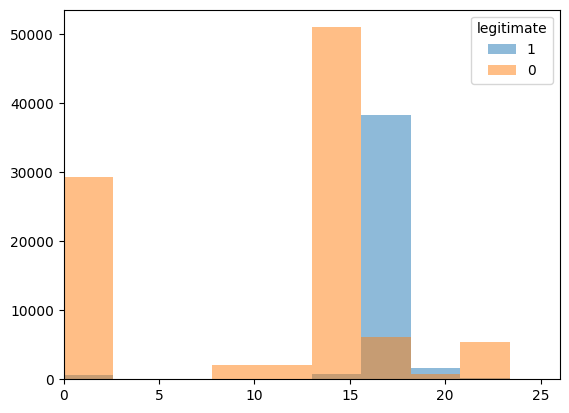

In [11]:
import matplotlib.pyplot as plt

plt.hist(
    Dataset.loc[Dataset['legitimate'] == 1,\
                       'VersionInformationSize'],
    range=(0,26), alpha=0.5, label='1'
    )
plt.hist(
    Dataset.loc[Dataset['legitimate'] == 0,\
                       'VersionInformationSize'],
    range=(0,26), alpha=0.5, label='0'
    )
plt.legend(title='legitimate')
plt.xlim(0,26)

(2.0, 11.0)

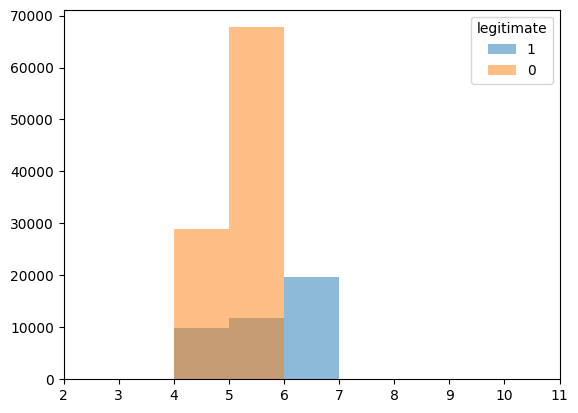

In [12]:
import matplotlib.pyplot as plt

plt.hist(
    Dataset.loc[Dataset['legitimate'] == 1,\
                            'MajorSubsystemVersion'],
         range=(0,10), alpha=0.5, label='1'
         )
plt.hist(
    Dataset.loc[Dataset['legitimate'] == 0,\
                            'MajorSubsystemVersion'],
         range=(0,10), alpha=0.5, label='0'
         )

plt.legend(title='legitimate')
plt.xlim(2,11)

(0.0, 10000.0)

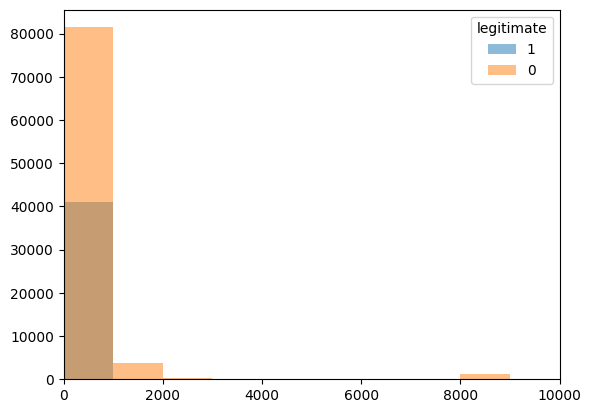

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(Dataset.loc[Dataset['legitimate'] == 1, 'SizeOfUninitializedData'], range=(0,10000), alpha=0.5, label='1')
plt.hist(Dataset.loc[Dataset['legitimate'] == 0, 'SizeOfUninitializedData'], range=(0,10000), alpha=0.5, label='0')
plt.legend(title='legitimate')
plt.xlim(0,10000)

In [14]:
print('The Number of features are  {} \n'.format(Dataset.shape[1]))

The Number of features are  57 



In [15]:
Dataset.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [16]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# データセットから名前、md5ハッシュ値、ラベルといった列を除外してXに代入
X = Dataset.drop(['Name', 'md5', 'legitimate'],axis='columns')
# データセットのラベル列のみを抽出してyに代入
y = Dataset['legitimate']
# ExtraTreesClassifierを使用
FeatSelect=ExtraTreesClassifier().fit(X, y)
# SelectFromModelを使用して、
# ExtraTreesClassifierによる分類結果に寄与した重要度の大きい特徴量のみを抽出
Model = SelectFromModel(FeatSelect, prefit=True)
# 重要度の大きい特徴量のカラム名を取得
feature_idx = Model.get_support()
feature_name = X.columns[feature_idx]
# Xに選択した特徴量のみを代入しなおす
X = Model.transform(X)
# 重要度の大きい特徴量のカラム名を設定
X = pd.DataFrame(X)
X.columns = feature_name

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [17]:
Features = X.shape[1]
# 重要度をリストで抽出
FI = ExtraTreesClassifier().fit(X,y).feature_importances_
# 重要度を高い順にソート
Index = np.argsort(FI)[::-1][:Features]
# 重要度の高い順に、特徴量の名前と重要度を出力
for feat  in range(Features):
    print(
        "Feature: {}Importance: {:.5f}"\
          .format(Dataset.columns[2+Index[feat]].ljust(30),
                  FI[Index[feat]])
          )

Feature: SizeOfUninitializedData       Importance: 0.16088
Feature: Characteristics               Importance: 0.13909
Feature: Machine                       Importance: 0.12452
Feature: SectionAlignment              Importance: 0.09715
Feature: BaseOfCode                    Importance: 0.07902
Feature: MajorLinkerVersion            Importance: 0.07567
Feature: SizeOfCode                    Importance: 0.07007
Feature: SizeOfInitializedData         Importance: 0.06372
Feature: SizeOfOptionalHeader          Importance: 0.04580
Feature: BaseOfData                    Importance: 0.04265
Feature: ImageBase                     Importance: 0.04229
Feature: MinorLinkerVersion            Importance: 0.03174
Feature: AddressOfEntryPoint           Importance: 0.02740


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
import numpy as np
import optuna
from sklearn.model_selection import cross_validate

# データセットを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=101
    )

# RandomForestClassifierのハイパーパラメータ探索用のクラスを設定
class Objective_RF:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __call__(self, trial):
        # 探索対象のパラメータの設定
        criterion = trial.suggest_categorical("criterion",
                                              ["gini", "entropy"])
        bootstrap = trial.suggest_categorical('bootstrap',
                                              [True, False])
        max_features = trial.suggest_categorical('max_features',
                                            ['auto', 'sqrt','log2'])
        min_samples_split = trial.suggest_int('min_samples_split',
                                              2, 5)
        min_samples_leaf = trial.suggest_int('min_samples_leaf',
                                             1,10)

        model = RandomForestClassifier(
            criterion = criterion,
            bootstrap = bootstrap,
            max_features = max_features,
            min_samples_split = min_samples_split,
            min_samples_leaf = min_samples_leaf
        )

        # 交差検証しながらベストのパラメータ探索を行う
        scores = cross_validate(model,
                                X=self.X,
                                y=self.y,
                                cv=5,
                                n_jobs=-1,
                                error_score='raise')
        
        # 5分割で交差検証した正解率の平均値を返す
        return scores['test_score'].mean()

# 探索の対象クラスを設定
objective = Objective_RF(X_train, y_train)
study = optuna.create_study()
# 最大で3分間探索を実行
study.optimize(objective, timeout=180)
# ベストのパラメータの出力
print('params:', study.best_params)

[I 2023-04-22 00:10:32,728] A new study created in memory with name: no-name-2696be61-2ee3-4429-83b1-3d8fa6f1e04d
[I 2023-04-22 00:11:28,463] Trial 0 finished with value: 0.9932540638452132 and parameters: {'criterion': 'entropy', 'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9932540638452132.
[I 2023-04-22 00:12:17,217] Trial 1 finished with value: 0.9917328348742773 and parameters: {'criterion': 'entropy', 'bootstrap': False, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.9917328348742773.
[I 2023-04-22 00:13:13,949] Trial 2 finished with value: 0.9933083964967027 and parameters: {'criterion': 'gini', 'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9917328348742773.
[I 2023-04-22 00:13:49,125] Trial 3 finished with value: 0.9910899342327838 and parameters: {'criterion': 'entropy', 

params: {'criterion': 'entropy', 'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 9}


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# optunaの探索結果として得られたベストのパラメータを設定
model = RandomForestClassifier(
    criterion = study.best_params['criterion'],
    bootstrap = study.best_params['bootstrap'],
    max_features = study.best_params['max_features'],
    min_samples_split = study.best_params['min_samples_split'],
    min_samples_leaf = study.best_params['min_samples_leaf']
)

# モデルの訓練
model.fit(X_train, y_train)

# テスト用のデータを使用して予測
pred = model.predict(X_test)

# 予測結果とテスト用のデータを使って正解率と、混同行列を出力
print("Accuracy: {:.5f} %".format(100 * accuracy_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

Accuracy: 99.14162 %
[[19342   124]
 [  113  8031]]


<Axes: >

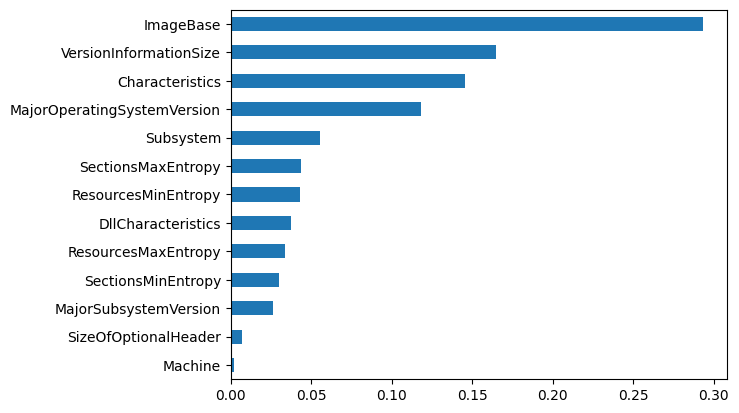

In [25]:
%matplotlib inline

feat_importances = pd.Series(
    model.feature_importances_,
    index=X.columns).sort_values(ascending=True)

feat_importances.plot(kind='barh')

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

class Objective_GBC:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __call__(self, trial):
        # 探索対象のパラメーターの指定
        max_depth=int(
            trial.suggest_loguniform("max_depth", 3, 10))
        max_features = trial.suggest_categorical(
            "max_features", ["log2", "sqrt"])
        learning_rate = float(trial.suggest_loguniform(
            "learning_rate", 1e-2, 1e-0))
        criterion =  trial.suggest_categorical(
            "criterion", ['squared_error', 'friedman_mse'])

        # モデルの初期化
        model = GradientBoostingClassifier(
            max_depth = max_depth,
            max_features = max_features,
            learning_rate = learning_rate,
            criterion=criterion
            )
        
        scores = cross_validate(model,
                                X=self.X, y=self.y,
                                cv=5,
                                n_jobs=-1,
                                error_score='raise')
        return scores['test_score'].mean()

# 探索の対象クラスを設定
objective = Objective_GBC(X_test, y_test)
study = optuna.create_study()

# 1回のみ探索
study.optimize(objective, n_trials=1)

# ベストのパラメーターの出力
print('params:', study.best_params)

[I 2023-04-22 00:17:40,347] A new study created in memory with name: no-name-7685edfa-64d2-428a-b238-82a388553597
<ipython-input-29-daa0d41ac8be>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  trial.suggest_loguniform("max_depth", 3, 10))
<ipython-input-29-daa0d41ac8be>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = float(trial.suggest_loguniform(
[I 2023-04-22 00:17:52,661] Trial 0 finished with value: 0.9877580586743934 and parameters: {'max_depth': 5.5705291212163655, 'max_features': 'log2', 'learning_rate': 0.022733607059311753, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.9877580586743934.


params: {'max_depth': 5.5705291212163655, 'max_features': 'log2', 'learning_rate': 0.022733607059311753, 'criterion': 'friedman_mse'}


In [32]:
study.best_params

{'max_depth': 5.5705291212163655,
 'max_features': 'log2',
 'learning_rate': 0.022733607059311753,
 'criterion': 'friedman_mse'}

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 探索結果として得られたベストのパラメーターを設定
model = GradientBoostingClassifier(
    criterion = study.best_params['criterion'],
    learning_rate = study.best_params['learning_rate'],
    max_depth = 5, #study.best_params['max_depth'],
    max_features = study.best_params['max_features']
)

# モデルの訓練
model.fit(X_train, y_train)

# テスト用のデータを使用して予測
pred = model.predict(X_test)

# 予測結果とテスト用のデータを使って正解率と、混同行列を出力
print("Accuracy: {:.5f} %".format(100 * accuracy_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

Accuracy: 98.80478 %
[[19323   143]
 [  187  7957]]


<Axes: >

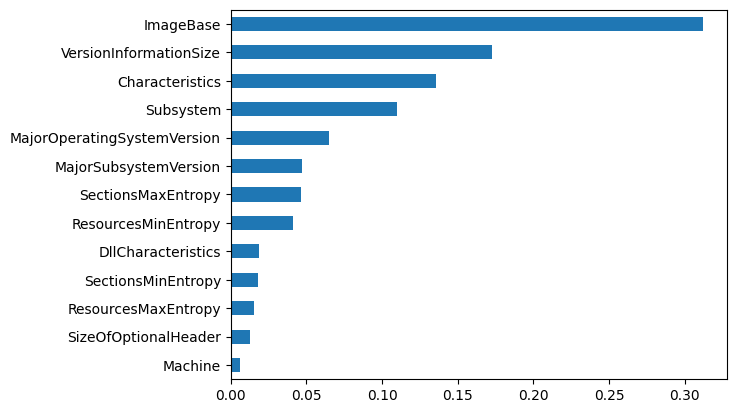

In [36]:
feat_importances = pd.Series(
    model.feature_importances_,
    index=X.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')

In [37]:
from sklearn.ensemble import AdaBoostClassifier

class Objective_ABC:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __call__(self, trial):
        # 探索対象のパラメーターの指定
        algorithm =  trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"])
        learning_rate = float(trial.suggest_loguniform("learning_rate", 1e-2, 1e-0))

        # モデルの初期化
        model = AdaBoostClassifier(
            algorithm = algorithm,
            learning_rate = learning_rate
            )
        
        scores = cross_validate(model,
                                X=self.X, y=self.y,
                                cv=5,
                                n_jobs=-1)
        return scores['test_score'].mean()

# 探索の対象クラスを設定
objective = Objective_ABC(X_train, y_train)
study = optuna.create_study()

# 最大で1分間探索を実行
study.optimize(objective, timeout=60)

# ベストのパラメーターの出力
print('params:', study.best_params)

[I 2023-04-22 00:39:52,844] A new study created in memory with name: no-name-ede8c421-b2a1-4fb4-a7a2-766d79e61b66
<ipython-input-37-825742a2a737>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = float(trial.suggest_loguniform("learning_rate", 1e-2, 1e-0))
[I 2023-04-22 00:40:11,887] Trial 0 finished with value: 0.9851680035948848 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.35697362084292755}. Best is trial 0 with value: 0.9851680035948848.
<ipython-input-37-825742a2a737>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = float(trial.suggest_loguniform("learning_rate", 1e-2, 1e-0))
[I 2023-04-22 00

params: {'algorithm': 'SAMME.R', 'learning_rate': 0.01456577687402829}


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 探索結果として得られたベストのパラメーターを設定
model = AdaBoostClassifier(
    algorithm = study.best_params['algorithm'],
    learning_rate = study.best_params['learning_rate']
)
# モデルの訓練
model.fit(X_train, y_train)

# テスト用のデータを使用して予測
pred = model.predict(X_test)

# 予測結果とテスト用のデータを使って正解率と、混同行列を出力
print("Accuracy: {:.5f} %".format(100 * accuracy_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

Accuracy: 95.35675 %
[[19201   265]
 [ 1017  7127]]


<Axes: >

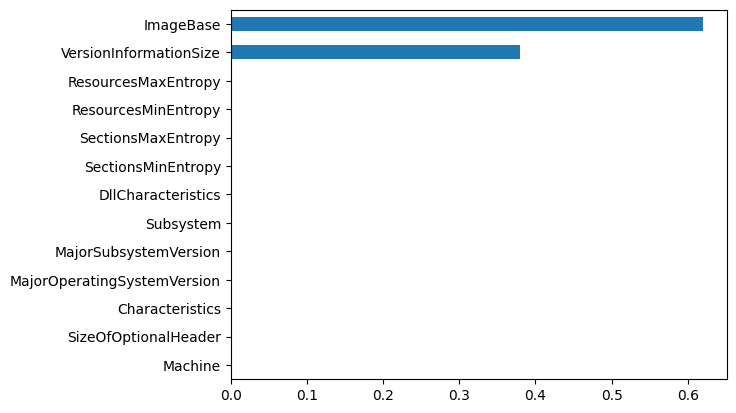

In [39]:
feat_importances = pd.Series(
    model.feature_importances_,
    index=X.columns).sort_values(ascending=True)

feat_importances.plot(kind='barh')

## Section2. まとめ
機械学習アルゴリズムごとに、特徴量の重要度はそれぞれ異なるものの、どれも `ImageBase` の特徴量としての重要度は高い。マルウェア解析を生業とする専門家からしてみれば当たり前なのかもしれない。言い換えるならば、「マルウェアらしさ」を示す特質や傾向を示すものがあれば、検出器もとい分類器に使用するアルゴリズムが異なったとしても、それは特徴量として大いに役立つことは明らかとなります。こうした専門知識に基づいた特徴量を抽出することは、他の分野でも同じことが言えることで、機械学習を利用する上で最も重要となります。